In [53]:
# !pip install scipy

In [2]:
from binance import Client
from datetime import datetime, timedelta
client = Client(api_key="jM9zEeTTzT7R7QGlNrh5tUpOc8l71hOxu7CewCL4M0NvbBp3ilgmEwMOOjJfCRVB",api_secret="iZxFmlz5bvROsHQPZTP5hlJtsxYjOu8wocOlLWzIDdhMzEQu7KyyHB2DseOYQ66s",testnet=True)

import os
from google.cloud.sql.connector import Connector
from sqlalchemy import create_engine, text
import pg8000.native
import pandas as pd

os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = 'C:/Users/tinma/OneDrive/Escritorio/application_default_credentials.json'

connector = Connector()

def getconn() -> pg8000.native.Connection:
    conn: pg8000.native.Connection = connector.connect(
        "semiotic-pact-388619:us-central1:tradingbot",
        "pg8000",
        user="postgres",
        password="GuruSat.3",
        db="criptos"
    )
    return conn

connection = create_engine('postgresql+pg8000://',creator=getconn)

def MACD(df):
    df['EMA12'] = df.Precio.ewm(span=12).mean()
    df['EMA26'] = df.Precio.ewm(span=26).mean()
    df['MACD'] = df.EMA12 - df.EMA26
    df['Signal'] = df.MACD.ewm(span=9).mean()
    # print('Indicadores agregados')

def señal_MACD(df):
    buy, sell = [],[]
    for i in range(7,len(df)):
        if df.MACD.iloc[i] > df.Signal.iloc[i] and df.MACD.iloc[i-1] < df.Signal.iloc[i-1]:
            buy.append(i)
        elif df.MACD.iloc[i] < df.Signal.iloc[i] and df.MACD.iloc[i-1] > df.Signal.iloc[i-1]:
            sell.append(i)
    return buy, sell

In [4]:
info = client.get_isolated_margin_symbol(symbol='BTCUSDT')

BinanceAPIException: APIError(code=-2008): Invalid Api-Key ID.

In [5]:
client.get_account()

{'makerCommission': 0,
 'takerCommission': 0,
 'buyerCommission': 0,
 'sellerCommission': 0,
 'commissionRates': {'maker': '0.00000000',
  'taker': '0.00000000',
  'buyer': '0.00000000',
  'seller': '0.00000000'},
 'canTrade': True,
 'canWithdraw': False,
 'canDeposit': False,
 'brokered': False,
 'requireSelfTradePrevention': False,
 'updateTime': 1688459952317,
 'accountType': 'SPOT',
 'balances': [{'asset': 'BNB',
   'free': '1000.00000000',
   'locked': '0.00000000'},
  {'asset': 'BTC', 'free': '1.01000000', 'locked': '0.00000000'},
  {'asset': 'BUSD', 'free': '10000.00000000', 'locked': '0.00000000'},
  {'asset': 'ETH', 'free': '100.20000000', 'locked': '0.00000000'},
  {'asset': 'LTC', 'free': '500.00000000', 'locked': '0.00000000'},
  {'asset': 'TRX', 'free': '500000.00000000', 'locked': '0.00000000'},
  {'asset': 'USDT', 'free': '9255.73043351', 'locked': '0.00000000'},
  {'asset': 'XRP', 'free': '50000.00000000', 'locked': '0.00000000'}],
 'permissions': ['SPOT']}

In [88]:
day = datetime.utcnow() - timedelta(1)

with connection.connect() as conn:
    df =conn.execute(text(""" SELECT * FROM "BNBUSDT" WHERE "Tiempo" > '{day}' """.format(day=day))).mappings().all()
df = pd.DataFrame(df)[['Tiempo', 'Precio']].set_index('Tiempo')
df = df.sort_values(by='Tiempo')
df

,Precio
Tiempo,
2023-06-29 15:29:03.006,233.8
2023-06-29 15:29:03.609,233.7
2023-06-29 15:29:04.923,233.8
2023-06-29 15:29:05.449,233.8
2023-06-29 15:29:09.831,233.8
...,...
2023-06-30 15:28:50.866,235.3
2023-06-30 15:28:51.597,235.3
2023-06-30 15:28:53.199,235.3


In [126]:
day = datetime.utcnow() - timedelta(seconds=1000)

with connection.connect() as conn:
    df =conn.execute(text(""" SELECT * FROM "ETHUSDT" WHERE "Tiempo" > '{day}' """.format(day=day))).mappings().all()
df = pd.DataFrame(df)[['Tiempo', 'Precio']].set_index('Tiempo')
df = df.sort_values(by='Tiempo')
df

,Precio
Tiempo,
2023-07-02 01:55:28.913,1919.00
2023-07-02 01:55:30.382,1919.01
2023-07-02 01:55:34.404,1918.78
2023-07-02 01:55:34.662,1918.65
2023-07-02 01:55:36.400,1918.62
...,...
2023-07-02 02:11:56.513,1919.38
2023-07-02 02:12:01.134,1919.38
2023-07-02 02:12:02.508,1919.38


In [8]:
def slopee(x1,y1,x2,y2):
    x = (y2 - y1) / (x2 - x1).total_seconds()
    return x

C:\Users\tinma\AppData\Local\Temp\ipykernel_33172\908954939.py:4: RuntimeWarning: invalid value encountered in double_scalars
  x = (y2 - y1) / (x2 - x1).total_seconds()


-0.0016026258079450662

In [6]:
day = datetime.utcnow() - timedelta(1)

with connection.connect() as conn:
    df =conn.execute(text(""" SELECT * FROM "BTCUSDT" WHERE "Tiempo" > '{day}' """.format(day=day))).mappings().all()
df = pd.DataFrame(df)[['Tiempo', 'Precio']].set_index('Tiempo')
df = df.sort_values(by='Tiempo')
df

,Precio
Tiempo,
2023-07-03 10:44:11.750,30648.16
2023-07-03 10:44:12.110,30648.17
2023-07-03 10:44:15.880,30648.16
2023-07-03 10:44:16.632,30648.17
2023-07-03 10:44:18.938,30648.17
...,...
2023-07-04 10:44:00.672,31031.18
2023-07-04 10:44:05.617,31031.18
2023-07-04 10:44:06.864,31031.19


In [9]:
df[df.index >= pd.to_datetime('2023-07-04 10:33:57.608820')][50:100]

,Precio
Tiempo,
2023-07-04 10:35:55.581,30964.73
2023-07-04 10:35:57.123,30996.36
2023-07-04 10:36:00.125,31021.99
2023-07-04 10:36:01.116,31022.00
2023-07-04 10:36:05.103,31019.55
2023-07-04 10:36:06.121,31023.38
2023-07-04 10:36:08.981,31026.57
2023-07-04 10:36:09.485,31026.57
2023-07-04 10:36:12.819,31026.57


In [119]:
def slopee_moving_average(df):

    pendientes = []

    for i in range(len(df)-1):
        x = slopee(df.index[i],df.Precio[i],df.index[i+1],df.Precio[i+1])
        pendientes.append(x)

    df['pendiente'] = pendientes

    df['SMA3'] = pd.Series()
    df['SMA5'] = pd.Series()
    df['SMA7'] = pd.Series()
    df['SMA11'] = pd.Series()

    for i in range(2,len(df)-1):
        df['SMA3'][i] = df.pendiente[i-2:i+1].mean()
        if i < 14:
            df['SMA3'][i-3] = 0
    for i in range(4,len(df)-1):
        df['SMA5'][i] = df.pendiente[i-4:i+1].mean()
        if i < 16:
            df['SMA5'][i-5] = 0
    for i in range(6,len(df)-1):
        df['SMA7'][i] = df.pendiente[i-6:i+1].mean()
        if i < 18:
            df['SMA7'][i-7] = 0
    for i in range(10,len(df)-1):
        df['SMA11'][i] = df.pendiente[i-10:i+1].mean()
        if i < 22:
            df['SMA11'][i-11] = 0

In [36]:
df[0:50]

,Precio,pendiente,SMA3,SMA5,SMA7,SMA11
Tiempo,,,,,,
2023-06-29 19:16:01.462,30512.00,0.000000,0.000000,0.000000,0.000000,0.000000
2023-06-29 19:16:03.201,30512.00,0.000000,0.000000,0.000000,0.000000,0.000000
2023-06-29 19:16:06.117,30512.00,0.000000,0.000000,0.000000,0.000000,0.000000
2023-06-29 19:16:07.199,30511.99,-0.009242,0.000000,0.000000,0.000000,0.000000
2023-06-29 19:16:10.954,30504.77,-1.922770,0.000000,0.000000,0.000000,0.000000
2023-06-29 19:16:12.224,30504.77,0.000000,0.000000,0.000000,0.000000,0.000000
2023-06-29 19:16:14.972,30504.77,0.000000,0.000000,0.000000,0.000000,0.000000
2023-06-29 19:16:15.808,30504.78,0.011962,0.000000,0.000000,0.000000,0.000000
2023-06-29 19:16:19.182,30504.77,-0.002964,0.000000,0.000000,0.000000,0.000000


In [18]:
df[df.index >= pd.to_datetime('2023-06-29 19:16:00.622070')][:50]

,Precio,pendiente
Tiempo,,
2023-06-29 19:16:01.462,30512.00,0.000000
2023-06-29 19:16:03.201,30512.00,0.000000
2023-06-29 19:16:06.117,30512.00,0.000000
2023-06-29 19:16:07.199,30511.99,-0.009242
2023-06-29 19:16:10.954,30504.77,-1.922770
2023-06-29 19:16:12.224,30504.77,0.000000
2023-06-29 19:16:14.972,30504.77,0.000000
2023-06-29 19:16:15.808,30504.78,0.011962
2023-06-29 19:16:19.182,30504.77,-0.002964


In [85]:
30518 * 0.003

91.554

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

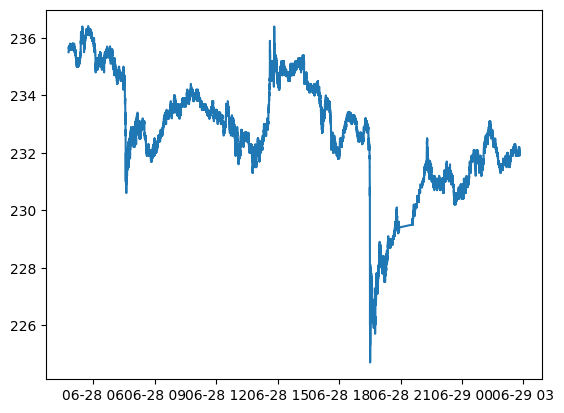

In [38]:
plt.scatter()
plt.plot(df['Precio'])

In [76]:
client.get_account()

{'makerCommission': 0,
 'takerCommission': 0,
 'buyerCommission': 0,
 'sellerCommission': 0,
 'commissionRates': {'maker': '0.00000000',
  'taker': '0.00000000',
  'buyer': '0.00000000',
  'seller': '0.00000000'},
 'canTrade': True,
 'canWithdraw': False,
 'canDeposit': False,
 'brokered': False,
 'requireSelfTradePrevention': False,
 'updateTime': 1688092858479,
 'accountType': 'SPOT',
 'balances': [{'asset': 'BNB',
   'free': '1000.00000000',
   'locked': '0.00000000'},
  {'asset': 'BTC', 'free': '1.00000000', 'locked': '0.00000000'},
  {'asset': 'BUSD', 'free': '10000.00000000', 'locked': '0.00000000'},
  {'asset': 'ETH', 'free': '100.00000000', 'locked': '0.00000000'},
  {'asset': 'LTC', 'free': '500.00000000', 'locked': '0.00000000'},
  {'asset': 'TRX', 'free': '500000.00000000', 'locked': '0.00000000'},
  {'asset': 'USDT', 'free': '10050.06616159', 'locked': '0.00000000'},
  {'asset': 'XRP', 'free': '50000.00000000', 'locked': '0.00000000'}],
 'permissions': ['SPOT']}

In [32]:
buy_order = client.create_order(
                        symbol='BTCUSDT',
                        side=Client.SIDE_BUY,
                        type=Client.ORDER_TYPE_MARKET,
                        quantity=0.1
                    )

In [30]:
sell_order = client.create_order(
                            symbol='BNBUSDT',
                            side=Client.SIDE_SELL,
                            type=Client.ORDER_TYPE_MARKET,
                            quantity=0.1
                        )

### Separación de tiempo entre señales de compra y de venta y entre ellas mismas.

In [111]:
with connection.connect() as conn:
    df =conn.execute(text(""" SELECT * FROM "BTCUSDT" """)).mappings().all()
df = pd.DataFrame(df)[['Tiempo', 'Precio']].set_index('Tiempo')
df = df.sort_values(by='Tiempo')
df

,Precio
Tiempo,
2023-06-14 09:12:03.975,25920.01
2023-06-14 09:12:05.109,25920.01
2023-06-14 09:12:06.210,25920.01
2023-06-14 09:12:06.929,25920.01
2023-06-14 09:12:07.559,25920.01
...,...
2023-06-30 21:27:44.492,30438.72
2023-06-30 21:27:45.617,30436.93
2023-06-30 21:27:45.617,30436.93


In [114]:
def ganancias(df):
    MACD(df)
    buy, sell = señal_MACD(df)
    buyprices = df.Precio.iloc[buy]
    sellprices = df.Precio.iloc[sell]
    if sellprices.index[0] < buyprices.index[0]:
        sellprices = sellprices.drop(sellprices.index[0])
    elif buyprices.index[-1] > sellprices.index[-1]:
        buyprices = buyprices.drop(buyprices.index[-1])
    ganancias = []
    for i in range(len(buyprices)):
        ganancias.append((sellprices[i:i+1].item() - buyprices[i:i+1].item()))
    ganancias = pd.DataFrame(ganancias,columns=['ganancia'])
    print(sum(ganancias['ganancia'])*.1)

In [115]:
ganancias(df)

5166.807000000049


In [87]:
MACD(df)

buy, sell = señal_MACD(df)

buyprices = df.Precio.iloc[buy]
sellprices = df.Precio.iloc[sell]

In [95]:
deltas = []
for i in range(len(df)-1):
    delta = df.index[i+1] - df.index[i]
    deltas.append(delta)

df_deltas = pd.DataFrame(deltas,columns=['deltas'])
df_deltas

,deltas
0,0 days 00:00:00.603000
1,0 days 00:00:01.314000
2,0 days 00:00:00.526000
3,0 days 00:00:04.382000
4,0 days 00:00:06.778000
...,...
37716,0 days 00:00:03.231000
37717,0 days 00:00:00.731000
37718,0 days 00:00:01.602000
37719,0 days 00:00:00.478000


In [96]:
df_deltas.describe()

,deltas
count,37721
mean,0 days 00:00:02.290282654
std,0 days 00:00:01.971074692
min,0 days 00:00:00.002000
25%,0 days 00:00:00.965000
50%,0 days 00:00:01.437000
75%,0 days 00:00:03.255000
max,0 days 00:00:26.295000


In [108]:
df_deltas[df_deltas['deltas'] >= '0 days 00:00:13.000'].sort_values(by='deltas')

,deltas
10552,0 days 00:00:13.048000
21675,0 days 00:00:13.054000
5573,0 days 00:00:13.060000
6775,0 days 00:00:13.106000
9205,0 days 00:00:13.155000
241,0 days 00:00:13.214000
3578,0 days 00:00:13.230000
9510,0 days 00:00:13.242000
8900,0 days 00:00:13.313000
8952,0 days 00:00:13.317000
